In [4]:
from BorderModel import BorderData, clean_df_subset
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from dbhelper import pd_query
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV

In [5]:
query = '''
        select 
            m.date,
            metric as waittime,
            year,
            month,
            week,
            dayofweek,
            minofday,
            w.temp_max,
            w.temp_mean,
            w.temp_min,
            w.viz_max,
            w.wind_max,
            w.precip,
            w.rain,
            w.snow,
            w.fog,
            w.thunderstorm,
            wp1.temp_max as temp_max_p1,
            wp1.temp_mean as temp_mean_p1,
            wp1.temp_min as temp_min_p1,
            wp1.precip as precip_p1,
            wp1.rain as rain_p1,
            wp1.snow as snow_p1,
            wp1.thunderstorm as thunderstorm_p1,
            wp2.temp_max as temp_max_p2,
            wp2.temp_mean as temp_mean_p2,
            wp2.temp_min as temp_min_p2,
            wp2.precip as precip_p2,
            wp2.rain as rain_p2,
            wp2.snow as snow_p2,
            wp2.thunderstorm as thunderstorm_p2,
            wp3.temp_max as temp_max_p3,
            wp3.temp_mean as temp_mean_p3,
            wp3.temp_min as temp_min_p3,
            wp3.precip as precip_p3,
            wp3.rain as rain_p3,
            wp3.snow as snow_p3,
            wp3.thunderstorm as thunderstorm_p3,
            wm1.temp_max as temp_max_m1,
            wm1.temp_mean as temp_mean_m1,
            wm1.temp_min as temp_min_m1,
            wm1.precip as precip_m1,
            wm1.rain as rain_m1,
            wm1.snow as snow_m1,
            wm1.thunderstorm as thunderstorm_m1,
            wm2.temp_max as temp_max_m2,
            wm2.temp_mean as temp_mean_m2,
            wm2.temp_min as temp_min_m2,
            wm2.precip as precip_m2,
            wm2.rain as rain_m2,
            wm2.snow as snow_m2,
            wm2.thunderstorm as thunderstorm_m2,
            s.event,
            s_lead1.event as event_lead1,
            s_lag1.event as event_lag1,
            s_lead2.event as event_lead2,
            s_lag2.event as event_lag2,
            s_lead3.event as event_lead3,
            s_lag3.event as event_lag3,
            s_lead4.event as event_lead4,
            s_lag4.event as event_lag4,
            sch.district as sd,
            sch_lag1.district as sd_lag1,
            sch_lead1.district as sd_lead1,
            sch_lag2.district as sd_lag2,
            sch_lead2.district as sd_lead2,
            sch_lag3.district as sd_lag3,
            sch_lead3.district as sd_lead3
        from mungedata m
        join datefeatures d on m.date = d.date
        left join publicholiday h on m.date::timestamp::date = h.date
        left join weather w on m.date::timestamp::date = w.date
        left join weather wp1 on m.date::timestamp::date = wp1.date - interval '1 day'
        left join weather wp2 on m.date::timestamp::date = wp2.date - interval '2 day'
        left join weather wp3 on m.date::timestamp::date = wp3.date - interval '3 day'
        left join weather wm1 on m.date::timestamp::date = wm1.date + interval '1 day'
        left join weather wm2 on m.date::timestamp::date = wm2.date + interval '2 day'
        left join specialdates s on m.date::timestamp::date = s.date
        left join specialdates s_lead1 on m.date::timestamp::date = s_lead1.date - interval '1 day'
        left join specialdates s_lag1 on m.date::timestamp::date = s_lag1.date + interval '1 day'
        left join specialdates s_lead2 on m.date::timestamp::date = s_lead2.date - interval '2 day'
        left join specialdates s_lag2 on m.date::timestamp::date = s_lag2.date + interval '2 day'
        left join specialdates s_lead3 on m.date::timestamp::date = s_lead3.date - interval '3 day'
        left join specialdates s_lag3 on m.date::timestamp::date = s_lag3.date + interval '3 day'
        left join specialdates s_lead4 on m.date::timestamp::date = s_lead4.date - interval '4 day'
        left join specialdates s_lag4 on m.date::timestamp::date = s_lag4.date + interval '4 day'
        left join schoolcalendar sch on m.date::timestamp::date = sch.date_out 
        left join schoolcalendar sch_lag1 on m.date::timestamp::date = sch.date_out + interval '1 day'
        left join schoolcalendar sch_lead1 on m.date::timestamp::date = sch_lead1.date_out - interval '1 day'
        left join schoolcalendar sch_lag2 on m.date::timestamp::date = sch_lag2.date_out + interval '2 day'
        left join schoolcalendar sch_lead2 on m.date::timestamp::date = sch_lead2.date_out - interval '2 day'
        left join schoolcalendar sch_lag3 on m.date::timestamp::date = sch_lag3.date_out + interval '3 day'
        left join schoolcalendar sch_lead3 on m.date::timestamp::date = sch_lead3.date_out - interval '3 day'
        where
            crossing_id = 1
            and m.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
            and is_waittime = true
        order by m.date;
        '''

df = pd_query(query)

In [6]:
from BorderModel import BorderData
data = BorderData(df, categoricals=['event', 'sd'])

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)

data.predict(grid)
data.print_metrics(grid)

OOB:  0.995981660248
Best score:  -0.108258384593
** MSE for last cv fold **
Baseline :  117.048333971
Model    :  125.08935318
** R^2 for last cv fold **
Baseline :  0.286162059509
Model    :  0.237122620875
** Explained variance for last cv fold **
Baseline :  0.43812843759
Model    :  0.364848701334


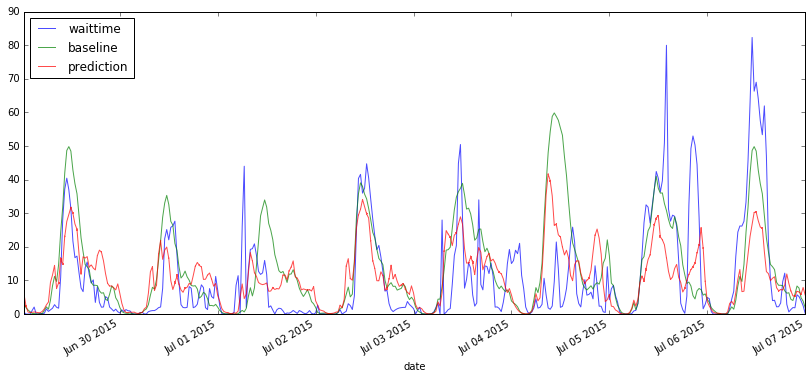

In [7]:
data.plot('6/29/15', '7/7/15');

## 10+ minutes to run on AWS.  What happens if we drop n_estimators to 10?
* 11:16 start; 11:20 complete
* It appears that each estimator runs in its own process so 10 or 32 will take same amount of time
* Quality of prediction is considerably worse .24 vs .17
* A better balance may be running 96 (or 1 or 2 fewer) to take advantage of all processors 

In [9]:
model_10 = ExtraTreesRegressor(n_jobs=-1, n_estimators=10, bootstrap=True, oob_score=True)
params = {}
grid_10 = GridSearchCV(model_10, params, cv=data.cv_train)
grid_10.fit(data.X_train, data.y_train)

data.predict(grid_10)
data.print_metrics(grid_10)

OOB:  0.977550671131
Best score:  -0.0767867806019
** MSE for last cv fold **
Baseline :  117.048333971
Model    :  135.47256809
** R^2 for last cv fold **
Baseline :  0.286162059509
Model    :  0.17379892804
** Explained variance for last cv fold **
Baseline :  0.43812843759
Model    :  0.309828378862


/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


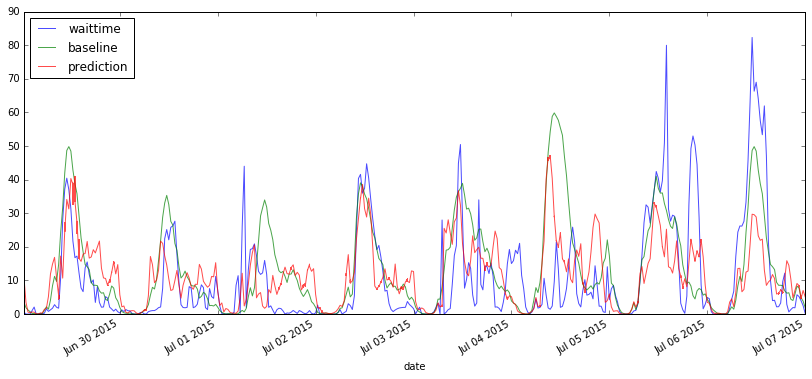

In [10]:
data.plot('6/29/15', '7/7/15');

In [12]:
import datetime

## Run with 64 estimators to take full advantage of 32 processors over 2 iterations

In [17]:
print "Start: ", datetime.datetime.now().time() 
model_64 = ExtraTreesRegressor(n_jobs=-1, n_estimators=64, bootstrap=True, oob_score=True)
params = {}
grid_64 = GridSearchCV(model_64, params, cv=data.cv_train)
grid_64.fit(data.X_train, data.y_train)
data.predict(grid_64)
data.print_metrics(grid_64)
print "Finish: ", datetime.datetime.now().time() 

Start:  19:47:48.946412
OOB:  0.995784602992
Best score:  -0.0637647752733
** MSE for last cv fold **
Baseline :  117.048333971
Model    :  126.433797339
** R^2 for last cv fold **
Baseline :  0.286162059509
Model    :  0.228923313654
** Explained variance for last cv fold **
Baseline :  0.43812843759
Model    :  0.359513633517
Finish:  19:57:06.978610


## Run with 32 estimators to take full advantage of 32 processors over 1 iteration

In [21]:
print "Start: ", datetime.datetime.now().time() 
model_32 = ExtraTreesRegressor(n_jobs=-1, n_estimators=32, bootstrap=True, oob_score=True)
params = {}
grid_32 = GridSearchCV(model_32, params, cv=data.cv_train)
grid_32.fit(data.X_train, data.y_train)
data.predict(grid_32)
data.print_metrics(grid_32)
print "Finish: ", datetime.datetime.now().time() 

Start:  20:12:35.738089
OOB:  0.995048860162
Best score:  -0.0527206004107
** MSE for last cv fold **
Baseline :  117.048333971
Model    :  125.970140127
** R^2 for last cv fold **
Baseline :  0.286162059509
Model    :  0.231751001139
** Explained variance for last cv fold **
Baseline :  0.43812843759
Model    :  0.363024642571
Finish:  20:17:54.674377


## Any benefit to running fewer processors?  Run with 30
30 sec faster

In [20]:
print "Start: ", datetime.datetime.now().time() 
model_30 = ExtraTreesRegressor(n_jobs=-1, n_estimators=30, bootstrap=True, oob_score=True)
params = {}
grid_30 = GridSearchCV(model_30, params, cv=data.cv_train)
grid_30.fit(data.X_train, data.y_train)
data.predict(grid_30)
data.print_metrics(grid_30)
print "Finish: ", datetime.datetime.now().time() 

Start:  20:05:29.317008
OOB:  0.995288314938
Best score:  -0.00075596765957
** MSE for last cv fold **
Baseline :  117.048333971
Model    :  127.216441766
** R^2 for last cv fold **
Baseline :  0.286162059509
Model    :  0.22415023174
** Explained variance for last cv fold **
Baseline :  0.43812843759
Model    :  0.351173255547
Finish:  20:10:24.822664


## Most important features

In [24]:
data.X.columns.values[np.argsort(grid_32.best_estimator_.feature_importances_)[::-1]]\
    [np.array(sorted(grid_32.best_estimator_.feature_importances_)[::-1]) >= .0001]  # ^^sorts^^ <<filters

array(['minofday', 'year', 'dayofweek', 'week', 'month', 'event_lag2_xmas',
       'temp_max_m2', 'event_lead2_civic', 'temp_min_m2', 'wind_max',
       'temp_max_p1', 'temp_min', 'temp_min_m1', 'rain_p2', 'temp_max_m1',
       'temp_max', 'rain_p3', 'temp_min_p1', 'temp_min_p3', 'temp_max_p2',
       'temp_max_p3', 'temp_mean_p2', 'temp_mean_m2', 'temp_mean_m1',
       'temp_mean', 'temp_min_p2', 'rain_m1', 'rain', 'temp_mean_p1',
       'temp_mean_p3', 'event_xmas', 'rain_p1', 'rain_m2', 'precip_p1',
       'precip_p3', 'precip_m1', 'event_lead1_civic', 'precip', 'fog',
       'precip_m2', 'precip_p2', 'event_lag4_civic',
       'event_lead2_newyears', 'event_lead2_labor', 'event_lead4_newyears',
       'event_lead1_xmas', 'event_lead4_civic', 'event_lead3_labor',
       'event_lag3_xmas', 'event_lag3_canada', 'snow_p3', 'event_civic',
       'event_lag4_xmas', 'event_independence', 'thunderstorm_m1',
       'event_lead3_newyears', 'event_lead3_civic', 'snow',
       'thunderstorm_m2

## Least important features

In [23]:
data.X.columns.values[np.argsort(grid_32.best_estimator_.feature_importances_)[::-1]]\
    [np.array(sorted(grid_32.best_estimator_.feature_importances_)[::-1]) < .0001]  # ^^sorts^^ <<filters

array(['viz_max', 'sd_lag2_seattle', 'sd_lead1_vancouver',
       'sd_lag2_vancouver', 'sd_lag3_seattle', 'event_mlk',
       'sd_lead3_seattle', 'event_lag1_thanksgiving', 'event_thanksgiving',
       'event_lead4_veterans', 'sd_lead2_seattle',
       'event_lead2_goodfriday', 'event_lag1_veterans', 'sd_lead1_seattle',
       'event_lead2_halloween', 'event_lag3_thanksgiving',
       'event_lag2_thanksgiving', 'event_lead3_victoria',
       'event_lead1_veterans', 'event_lead1_ca_thanksgiving',
       'event_lag1_labor', 'event_lead3_ca_thanksgiving', 'event_victoria',
       'event_lead3_president', 'event_lead2_veterans',
       'event_lead2_memorial', 'event_lead3_veterans',
       'event_lead2_president', 'event_lag2_veterans',
       'event_lag3_newyears', 'event_halloween', 'event_lag3_veterans',
       'event_lead3_goodfriday', 'event_lead1_memorial',
       'event_lead1_mothers', 'event_lag4_victoria',
       'event_lag4_president', 'event_lead2_mothers',
       'event_lead3_m

# Investigate why R2 values are higher than last set of estimates
v0.5 r2 is .147
v0.6 r2 is .286

Duplicate records come from join of schoolcalendars

In [30]:
query = '''
                select 
            m.date,
            metric as waittime,
            year,
            month,
            week,
            dayofweek,
            minofday,
            w.temp_max,
            w.temp_mean,
            w.temp_min,
            w.viz_max,
            w.wind_max,
            w.precip,
            w.rain,
            w.snow,
            w.fog,
            w.thunderstorm,
            wp1.temp_max as temp_max_p1,
            wp1.temp_mean as temp_mean_p1,
            wp1.temp_min as temp_min_p1,
            wp1.precip as precip_p1,
            wp1.rain as rain_p1,
            wp1.snow as snow_p1,
            wp1.thunderstorm as thunderstorm_p1,
            wp2.temp_max as temp_max_p2,
            wp2.temp_mean as temp_mean_p2,
            wp2.temp_min as temp_min_p2,
            wp2.precip as precip_p2,
            wp2.rain as rain_p2,
            wp2.snow as snow_p2,
            wp2.thunderstorm as thunderstorm_p2,
            wp3.temp_max as temp_max_p3,
            wp3.temp_mean as temp_mean_p3,
            wp3.temp_min as temp_min_p3,
            wp3.precip as precip_p3,
            wp3.rain as rain_p3,
            wp3.snow as snow_p3,
            wp3.thunderstorm as thunderstorm_p3,
            wm1.temp_max as temp_max_m1,
            wm1.temp_mean as temp_mean_m1,
            wm1.temp_min as temp_min_m1,
            wm1.precip as precip_m1,
            wm1.rain as rain_m1,
            wm1.snow as snow_m1,
            wm1.thunderstorm as thunderstorm_m1,
            wm2.temp_max as temp_max_m2,
            wm2.temp_mean as temp_mean_m2,
            wm2.temp_min as temp_min_m2,
            wm2.precip as precip_m2,
            wm2.rain as rain_m2,
            wm2.snow as snow_m2,
            wm2.thunderstorm as thunderstorm_m2,
            s.event,
            s_lead1.event as event_lead1,
            s_lag1.event as event_lag1,
            s_lead2.event as event_lead2,
            s_lag2.event as event_lag2,
            s_lead3.event as event_lead3,
            s_lag3.event as event_lag3,
            s_lead4.event as event_lead4,
            s_lag4.event as event_lag4,
            1 as sea,
            1 as sea_lag1,
            1 as sea_lead1,
            1 as sea_lag2,
            1 as sea_lead2,
            1 as sea_lag3,
            1 as sea_lead3,
            1 as van,
            1 as van_lag1,
            1 as van_lead1,
            1 as van_lag2,
            1 as van_lead2,
            1 as van_lag3,
            1 as van_lead3
        from mungedata m
        join datefeatures d on m.date = d.date
        left join publicholiday h on m.date::timestamp::date = h.date
        left join weather w on m.date::timestamp::date = w.date
        left join weather wp1 on m.date::timestamp::date = wp1.date - interval '1 day'
        left join weather wp2 on m.date::timestamp::date = wp2.date - interval '2 day'
        left join weather wp3 on m.date::timestamp::date = wp3.date - interval '3 day'
        left join weather wm1 on m.date::timestamp::date = wm1.date + interval '1 day'
        left join weather wm2 on m.date::timestamp::date = wm2.date + interval '2 day'
        left join specialdates s on m.date::timestamp::date = s.date
        left join specialdates s_lead1 on m.date::timestamp::date = s_lead1.date - interval '1 day'
        left join specialdates s_lag1 on m.date::timestamp::date = s_lag1.date + interval '1 day'
        left join specialdates s_lead2 on m.date::timestamp::date = s_lead2.date - interval '2 day'
        left join specialdates s_lag2 on m.date::timestamp::date = s_lag2.date + interval '2 day'
        left join specialdates s_lead3 on m.date::timestamp::date = s_lead3.date - interval '3 day'
        left join specialdates s_lag3 on m.date::timestamp::date = s_lag3.date + interval '3 day'
        left join specialdates s_lead4 on m.date::timestamp::date = s_lead4.date - interval '4 day'
        left join specialdates s_lag4 on m.date::timestamp::date = s_lag4.date + interval '4 day'
        left join schoolcalendar sea on m.date::timestamp::date = sea.date_out and sea.district='seattle'
        left join schoolcalendar sea_lag1 on m.date::timestamp::date = sea_lag1.date_out + interval '1 day' and sea_lag1.district='seattle'
        left join schoolcalendar sea_lead1 on m.date::timestamp::date = sea_lead1.date_out - interval '1 day' and sea_lead1.district='seattle'
        left join schoolcalendar sea_lag2 on m.date::timestamp::date = sea_lag2.date_out + interval '2 day' and sea_lag2.district='seattle'
        left join schoolcalendar sea_lead2 on m.date::timestamp::date = sea_lead2.date_out - interval '2 day' and sea_lead2.district='seattle'
        left join schoolcalendar sea_lag3 on m.date::timestamp::date = sea_lag3.date_out + interval '3 day' and sea_lag3.district='seattle'
        left join schoolcalendar sea_lead3 on m.date::timestamp::date = sea_lead3.date_out - interval '3 day' and sea_lead3.district='seattle'
        left join schoolcalendar van on m.date::timestamp::date = van.date_out and van.district='vancouver'
        left join schoolcalendar van_lag1 on m.date::timestamp::date = van_lag1.date_out + interval '1 day' and van_lag1.district='vancouver'
        left join schoolcalendar van_lead1 on m.date::timestamp::date = van_lead1.date_out - interval '1 day' and van_lead1.district='vancouver'
        left join schoolcalendar van_lag2 on m.date::timestamp::date = van_lag2.date_out + interval '2 day' and van_lag2.district='vancouver'
        left join schoolcalendar van_lead2 on m.date::timestamp::date = van_lead2.date_out - interval '2 day' and van_lead2.district='vancouver'
        left join schoolcalendar van_lag3 on m.date::timestamp::date = van_lag3.date_out + interval '3 day' and van_lag3.district='vancouver'
        left join schoolcalendar van_lead3 on m.date::timestamp::date = van_lead3.date_out - interval '3 day' and van_lead3.district='vancouver'
        where
            crossing_id = 1
            and m.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
            and is_waittime = true
        order by m.date;
        '''

df1 = pd_query(query)

In [31]:
from BorderModel import BorderData
data = BorderData(df1, categoricals=['event'])

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)

data.predict(grid)
data.print_metrics(grid)

OOB:  0.909847856421
Best score:  0.371580660442
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  104.741501807
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0768704199172
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.291043988066


In [32]:
data.predict_ensemble()
data.print_metrics(grid)

OOB:  0.909847856421
Best score:  0.371580660442
** MSE for last cv fold **
Baseline :  96.7590735774
Model    :  104.741501807
Ensemble :  91.6061079898
Weights  :  (1.6154182612499322, 1.8730277058946647)
** R^2 for last cv fold **
Baseline :  0.14722281598
Model    :  0.0768704199172
Ensemble :  0.192638003628
** Explained variance for last cv fold **
Baseline :  0.304333505904
Model    :  0.291043988066
Ensemble :  0.34781068298


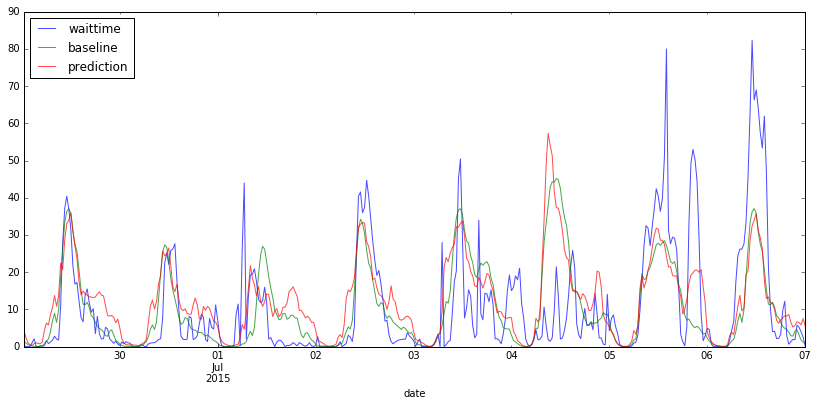

In [33]:
data.plot('6/29/15', '7/7/15');

In [49]:
data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]\
    [np.array(sorted(grid.best_estimator_.feature_importances_)[::-1]) >= .001]  # ^^sorts^^ <<filters

array(['minofday', 'dayofweek', 'year', 'week', 'month',
       'event_goodfriday', 'temp_min_m2', 'temp_mean_m2', 'wind_max',
       'temp_min_m1', 'temp_mean', 'temp_mean_p2', 'temp_min_p1',
       'temp_max_p1', 'temp_min_p2', 'temp_max_m2', 'temp_max',
       'temp_mean_m1', 'temp_min_p3', 'temp_min', 'temp_mean_p1',
       'temp_mean_p3', 'temp_max_p2', 'temp_max_m1', 'temp_max_p3',
       'precip_p1', 'precip_p3', 'precip_m2', 'precip', 'precip_m1',
       'precip_p2', 'rain_p3', 'rain_m2', 'rain_p1', 'rain_p2', 'rain_m1',
       'rain', 'event_veterans', 'event_lag2_xmas', 'fog',
       'event_lead2_newyears', 'event_lag1_newyears',
       'event_lead2_victoria', 'event_lead1_goodfriday',
       'event_lead1_victoria', 'event_memorial',
       'event_lead2_ca_thanksgiving', 'event_president',
       'event_lead1_president', 'event_lead3_newyears',
       'event_lead2_civic', 'event_lag1_goodfriday', 'event_lag4_xmas',
       'event_lag3_xmas', 'event_newyears', 'event_lead4_newy

In [54]:
print np.log(sorted(grid.best_estimator_.feature_importances_)[::-1])

[ -0.796555    -2.54860689  -2.73253697  -3.72715691  -3.80397747
  -4.55909291  -4.58635545  -4.61758639  -4.65527813  -4.68021379
  -4.72457971  -4.73906693  -4.74465174  -4.75558397  -4.76370551
  -4.76513335  -4.77341423  -4.79130318  -4.79354239  -4.8012239
  -4.80197851  -4.85685811  -4.85742345  -4.89209461  -4.89646357
  -4.92869523  -5.00464581  -5.00717385  -5.0410219   -5.05776997
  -5.12587901  -5.18951076  -5.23154453  -5.23688986  -5.24292665
  -5.27092334  -5.28809739  -5.31263802  -5.4575029   -5.49158726
  -5.61307897  -5.69922932  -5.78053536  -5.85494218  -5.93054145
  -5.94585797  -5.97364176  -5.99387101  -6.00265557  -6.15926468
  -6.16623389  -6.17828544  -6.22281668  -6.36391611  -6.3951014
  -6.40706252  -6.43344988  -6.47112405  -6.47773004  -6.51531307
  -6.51953611  -6.53025149  -6.55658905  -6.56383462  -6.57091436
  -6.60976549  -6.64103716  -6.65437177  -6.66810025  -6.67955677
  -6.69070733  -6.6908918   -6.70790397  -6.74819825  -6.75740101
  -6.8022074

In [45]:
data.X.columns.values[np.argsort(grid.best_estimator_.feature_importances_)[::-1]]\
    [np.array(sorted(grid.best_estimator_.feature_importances_)[::-1]) < .001]  # ^^sorts^^ <<filters

array(['event_lag4_thanksgiving', 'event_lag2_president',
       'event_lead4_ca_thanksgiving', 'event_lead1_independence',
       'event_lead4_thanksgiving', 'event_lag1_mothers',
       'event_lag2_victoria', 'event_lag3_labor', 'event_lag2_labor',
       'event_lag2_halloween', 'event_lag4_goodfriday',
       'event_lag1_ca_thanksgiving', 'event_lead1_mlk',
       'event_lag3_ca_thanksgiving', 'event_lead4_mothers',
       'event_lead3_mlk', 'event_lead3_thanksgiving', 'event_lag2_mothers',
       'event_lag4_halloween', 'event_lead1_thanksgiving',
       'event_lag4_newyears', 'event_lag1_mlk', 'event_lead2_thanksgiving',
       'event_lag2_mlk', 'van_lead3', 'sea_lead1', 'sea_lag1', 'sea',
       'sea_lead3', 'van_lag3', 'sea_lead2', 'van_lead2', 'van_lag2',
       'van_lead1', 'sea_lag3', 'van_lag1', 'van', 'sea_lag2'], dtype=object)